So, in this notebook, I have written down the code for multiple regression with Gradient Descent minimisation. The first cell contains the entire code to create the appropriate data frame which is explained in detail in my other notebook 'Numpy,Pandas and CSV'. Do check that out first. What I also aim to do is give you the general overview of how to approach any ML problem. This includes:
1. Loading up the dataset
    -  Using pandas, numpy as described in the other notebook
2. Plotting against the various independants
3. Remodelling the dataset for faster and better fitting of the model

In [71]:
import numpy as np
from numpy import ones, zeros, arange
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

L=pd.read_csv('machine.csv',header=None)

L=L.drop(L.columns[[1]],axis=1)
L=L[L[0]!='adviser']
L=L[L[0]!='microdata']
L=L[L[0]!='sratus']

Y=L[0].unique()
i=1
for y in Y:
    L[0].replace(y,i,inplace=True)
    i+=1

As good practice, we should always visualise the data we are dealing with in any ML problem. This helps us identify whether a feature affects a classification/regression or whether PCA etc. is needed. Matplotlib is a library that allows for visualisation of data. The syntax is shown in the first cell. We can create a scatter plot of the Machine Cycle Time and Estimated Relative performance. Various commands are displayed in the cell below. The name the functionality I guess ;). A very important thing to note is that we can keep adding plots and it will all show up when we use the show() command.

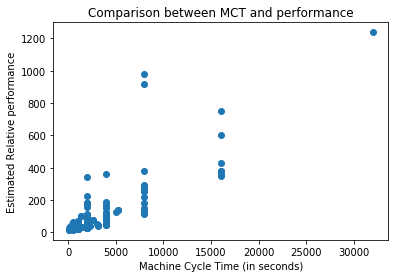

In [72]:
plt.scatter(L[3],L[9])
plt.xlabel('Machine Cycle Time (in seconds)')
plt.ylabel('Estimated Relative performance')
plt.title('Comparison between MCT and performance')
plt.show()

In [73]:
L.describe()

,0,2,3,4,5,6,7,8,9
count,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000
mean,15.597087,204.849515,2896.310680,11880.563107,24.330097,4.640777,17.223301,105.800971,99.451456
std,7.055030,262.015754,3898.714252,11789.268990,37.523947,6.813694,23.813680,161.745100,155.607559
min,1.000000,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,10.000000,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,17.000000,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,49.500000,45.500000
75%,20.000000,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,112.500000,100.500000
max,27.000000,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


 Right off the back, we notice that the features are differing too much in magnitude. This might cause a hinderance when converging the gradient descent. Hence we want to scale these features so they are closer to each other. Hence, one way to do this is to subtract by the mean and divide it by either the range or the standard deviation. The process is termed as 'Normalisation'. Refer to Andrew Ng coursera video for this

So, in the below normalisation, I also store the mean and standard deviation of every column since when we predict, we will input the unaltered values and hence, have to normalise it with this data.

In [74]:
def normalise(X):
    mean=X.mean()
    sd=X.std()
    
    for x in X:
        rep=(x-mean)/sd
        X.replace(x,rep,inplace=True)
    return mean,sd

mean_r=[]
std_r=[]
        
for i in range(0,10):
    if(i!=0 and i!=1):
        m,s=normalise(L[i])
        mean_r.append(m)
        std_r.append(s)
L.head(20)

,0,2,3,4,5,6,7,8,9
1,1,-0.671141,1.309070,1.706589,0.204400,0.493011,0.620513,1.008989,0.986768
2,1,-0.671141,1.309070,1.706589,0.204400,0.493011,0.620513,0.706043,0.986768
3,1,-0.671141,1.309070,1.706589,0.204400,0.493011,0.620513,0.409280,0.986768
4,1,-0.671141,1.309070,0.349423,0.204400,0.493011,-0.051370,0.161977,0.209171
5,1,-0.682591,1.309070,1.706589,1.057189,0.493011,0.620513,1.311935,1.224546
6,1,-0.694040,3.361028,1.706589,1.057189,1.667117,0.620513,1.614881,1.809350
7,1,-0.694040,3.361028,1.706589,1.057189,1.667117,0.620513,2.369154,1.809350
8,1,-0.694040,3.361028,4.420922,1.057189,1.667117,0.620513,3.277991,4.174274
9,1,-0.694040,7.464945,4.420922,2.762766,4.015329,1.964278,6.418736,7.316795
10,2,0.744804,-0.486394,-0.753275,-0.648389,-0.534332,-0.639267,-0.419184,-0.491309


Much better. All the columns are in range of each other.

Now, we have processed the data. For simplicity sake, I have also not considered the company type since if you draw the scatter plot of the target with X[0], you will notice that there is no good straight line fit to it and it produces too much variance. Notice below the command **as_matrix** converts our data frame to a numpy N dimensional array with outermost elements being the rows of the data frame. From there, I have split the data into X independants and y dependant.

In [75]:
mat=L.as_matrix()
X=mat[:,1:8]
y=mat[:,8]
X

array([[-0.671141  ,  1.30906986,  1.70658901, ...,  0.49301059,
         0.62051304,  1.00898902],
       [-0.671141  ,  1.30906986,  1.70658901, ...,  0.49301059,
         0.62051304,  0.70604321],
       [-0.671141  ,  1.30906986,  1.70658901, ...,  0.49301059,
         0.62051304,  0.40927997],
       ..., 
       [-0.40779805, -0.48639386, -0.32916062, ..., -0.38756902,
        -0.38731103, -0.36972354],
       [ 1.05012955, -0.61156333, -0.32916062, ..., -0.68109555,
        -0.72325239, -0.23988962],
       [ 1.05012955, -0.48639386, -0.66845223, ..., -0.68109555,
        -0.72325239, -0.37590611]])

However, we aren't done just yet. If you remember, the multiple regression equation has a bias term. A term that has weight with an input of 1. Hence, we must add that as well to the independants list

In [76]:
m=y.size
it=ones(shape=(m,8))
it[:,1:8]=X
it

array([[ 1.        , -0.671141  ,  1.30906986, ...,  0.49301059,
         0.62051304,  1.00898902],
       [ 1.        , -0.671141  ,  1.30906986, ...,  0.49301059,
         0.62051304,  0.70604321],
       [ 1.        , -0.671141  ,  1.30906986, ...,  0.49301059,
         0.62051304,  0.40927997],
       ..., 
       [ 1.        , -0.40779805, -0.48639386, ..., -0.38756902,
        -0.38731103, -0.36972354],
       [ 1.        ,  1.05012955, -0.61156333, ..., -0.68109555,
        -0.72325239, -0.23988962],
       [ 1.        ,  1.05012955, -0.48639386, ..., -0.68109555,
        -0.72325239, -0.37590611]])

Awesome. So our input X is ready and so is y. We can begin writing our gradient descent code. Refer to Andrew Ng's video on the equations. This is split into 2 parts:
1. The cost function
    -- We first write the function to compute the cost function with parameters as the theta matrix
2. The gradient descent
    -- The gradient descent is run on the cost function and theta is updated from here and this is continued for a set number of iterations.

In [77]:
theta=zeros(shape=(8,1))
iters=1500
alpha=0.01

In [78]:
def compute_cost(X,y,theta):
    predictions=X.dot(theta)
    sqErrors=predictions-y
    J=(1.0/(2*m))*sqErrors.T.dot(sqErrors)
    
    return J

Above, notice that multiplying every theta with its corresponding x value can be done by just taking the dot product, also known as Scalar outer product. The squared error, can also be expressed as the outer product between the error matrix and its transpose. Note also that J and predictions will be numbers. Again, Andrew Ng explains this much better.

In [79]:
def gradient_descent(X,y,theta,alpha,iters):
    J_history=zeros(shape=(iters,1))
    
    for i in range(iters):
        predictions=X.dot(theta)
        theta_size=theta.size
        
        for it in range(theta_size):
            temp=X[:,it]
            temp.shape=(m,1)
            
            errors_x1=(predictions-y)*temp
            theta[it][0]=theta[it][0]-alpha*(1.0/m)*errors_x1.sum()
        J_history[i, 0]=compute_cost(X,y,theta)
    return theta, J_history

The above code cannot be explained simply but read it once while looking at the formula and you will get the meaning of it.
Now that both functions have been written, all we have to do is call the function for our dataset. So, lets do that

In [80]:
y.shape=(m,1)
theta,J_history=gradient_descent(it,y,theta,alpha,iters)
print theta,J_history

[[ -4.88390342e-17]
 [  7.09198075e-02]
 [  1.77180956e-01]
 [  2.78126424e-01]
 [  3.71114602e-02]
 [ -7.43748097e-03]
 [  8.20852919e-02]
 [  5.23279884e-01]] [[ 0.46096208]
 [ 0.42737845]
 [ 0.39656888]
 ..., 
 [ 0.02057334]
 [ 0.02057266]
 [ 0.02057198]]


Perfect. Our algorithm has given some parameters and observing J_history, we can see that it is decreasing as the iterations increase. However, let us visualise a few more things.

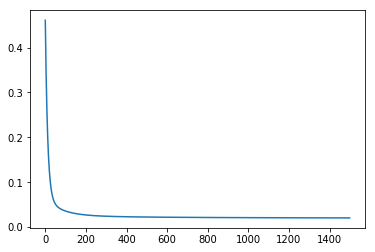

In [81]:
plt.plot(arange(iters),J_history)
plt.show()

This looks like a proper gradient descent algorithm. Running more iterations will further reduce the cost function

Okay, so all this is well and good. But we are missing an important aspect: how accurate or reliable is our model? We can't use a new input since we won't know whether it is giving the right output. But what we can do is check against the values we have. But we can;t use a value that is already in the training set. This is due to overfitting. Sometimes, a trained model will end up fitting the training values rather than fir a general pattern. The end result is that it will predict properly only within the training set accurately but fail sometimes on external examples. We thus, split our X and y into training and testing sets and use the test set to predict accuracy.

Scikit learn comes with a split function that allows us to decide the ratio of data between the training and testing sets.


In [82]:
X_train,X_test,y_train,y_test=train_test_split(it,y,test_size=0.2)

m=y_train.size
theta,J_history=gradient_descent(X_train,y_train,theta,alpha,iters)
print theta,J_history
#plt.plot(arange(iters),J_history)
#plt.show()

[[-0.00531171]
 [ 0.07282308]
 [ 0.14457074]
 [ 0.28665628]
 [ 0.03262975]
 [-0.00519909]
 [ 0.06515479]
 [ 0.57042189]] [[ 0.02369021]
 [ 0.02368332]
 [ 0.02367697]
 ..., 
 [ 0.02328851]
 [ 0.02328848]
 [ 0.02328845]]


In [83]:
y_predict=X_test.dot(theta)
errors=y_predict-y_test
ab=np.absolute(errors)
mean_error=(ab.sum()/errors.size)
mean_error

0.10661153448317082

So, our model has a mean squared error of about 3% and we can assume that our algorithm is about 97% accurate. Note that scikit learn comes with many accuracy score methods but cannot be used here since we haven't explicitly used the regression model present there. As a next step, let us predict what would be the accuracy of fitting this data into the inbuilt model

In [84]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
err=mean_absolute_error(y_test,y_pred)
err

0.093714823662668006

So, we can see more or less, the mean absolute errors is close by and in some cases, the gradient descent code written can have better accuracy. Increasing the number of iterations beyond 10000 will yield better resukts but always be careful as too many iterations result in over fitting.

So far, the code has been rather big and we have many things to consider for Graidient Descent like feature scaling, local minimas etc. However, a rather fast method exists in the normal equation method. So long as our number of training samples is less, we can use this to find theta values in one step equation without having to feature scale, set the learning rate or iterate many times. Roughly, the equation is (X'X)^-1.X'.y
    Refere to Andrew Ng's videos aagain. Here, X is called the design matrix

In [88]:
X_des=it
A=X_des.T.dot(X_des)
B=np.linalg.inv(A).dot(X_des.T)
theta_n=B.dot(y)
theta_n

array([[  2.08166817e-17],
       [  6.28810173e-02],
       [  1.39750595e-01],
       [  2.55771174e-01],
       [  2.29992137e-02],
       [  4.15653344e-05],
       [  5.39111142e-02],
       [  6.00857169e-01]])

So, when compared with the theta values obtained from the Gradient Descent algorithm, the values are almost similar with errors of 0.5% or less. So, it is a close enough approximation. Again, one thing to keep in mind is that X'X is an n square matrix where n is number of features. Thus, calculating its inverse is very cumbersome when no. of features becomes too large. Thus, when n>1000 etc. it is better to use Gradient Descent else the normal equation gives satisfactory results very fast

If you've made it this far, congrats on writing your very own Gradient Descent algorithm. Although scikit learn has its own model which we can implement in 4 lines, understanding how gradient descent works will form the basis on how Stochastic Gradient descent, addition of momentum etc. affects the model. I hope you understood this notebook. :)